# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [201]:
def clean_data(): 
    '''
    Reads and cleans the data.
    
    Returns:
    df - (DataFrame) The data frame that other methods would use for further wrangling. 
    '''
    df = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')
    df['Date_rev'] = list(map(pd.to_datetime, df['Date'])) #Adding a new column with values of date in timestamp.
    df.drop(['ID', 'Element'], axis = 1, inplace = True) #Dropping the columns not needed.
    df = df[df['Date'].str[5:] != '02-29'] #Removing all the leap days.
    return df.dropna()

In [202]:
def data_for_2015():
    '''
    Filters the data frame by year. Keeps the data only for 2015.
    
    Returns:
    high_2015 - (Series) The series containing the highest temperature on a given day in 2015, grouped by date.
    low_2015 - (Series) The series containing the lowest temperature on a given day in 2015, grouped by date.
    '''
    df_2015 = clean_data() #Getting the cleaned data frame.
    df_2015 = df_2015[df_2015['Date'].str.contains('2015')] #Filtering for data of year 2015.
    high_2015 = df_2015.groupby('Date_rev')['Data_Value'].max() #Getting the highest temperature.
    low_2015 = df_2015.groupby('Date_rev')['Data_Value'].min() #Getting the lowest temperature.
    return (high_2015, low_2015)

In [203]:
def get_high_low():
    '''
    Gets the highest and lowest of temperatures for a given day from 2005 to 2014.
    
    Returns:
    high_10 - (Series) The series containing the highest temperature for a day in 2005-2014, grouped by month and day.
    low_10 - (Series) The series containing the lowest temperature for a day in 2005-2014, grouped by month and day.
    '''
    df_10_years = clean_data() #Getting the cleaned data frame.
    df_10_years = df_10_years[df_10_years['Date'].str[:4] != '2015'] #Removing data of the year 2015.
    df_10_years['Month_Day'] = df_10_years['Date'].str[5:] #Keeping the month and day only.
    df_10_years.drop(['Date'], axis = 1, inplace = True) #Dropping the Date column.
    high = df_10_years.groupby('Month_Day')['Data_Value'].max() #Getting the highest temperature for a day in 10 years.
    low = df_10_years.groupby('Month_Day')['Data_Value'].min() #Getting the lowest temperature for a day in 10 years.
    return (high, low)

In [204]:
#Getting the data of the past 10 years and 2015.

h_2015, l_2015 = data_for_2015()
high_10 , low_10 = get_high_low()


#Preparing lists for the days in 2015 having greater/lower maximum/minimum temperature than the days in the 10 years.

higher_2015_index = [i for i in range(0,365) if (h_2015.iloc[i] >= high_10.iloc[i])]
higher_2015_values = [h_2015.iloc[i] for i in higher_2015_index]

lower_2015_index = [i for i in range(0,365) if (l_2015.iloc[i] <= low_10.iloc[i])]
lower_2015_values = [l_2015.iloc[i] for i in lower_2015_index]

#Making a list of 365 days.

days = list(range(0,365))

In [205]:
#Preparing the figure.
plt.figure(figsize=(20,10))
axis = plt.gca()

#Adding labels, titlea and filling the area between the highest and lowest temperature values in the 10 years.
axis.set_xlabel('Day')
axis.set_ylabel('Temperature (tenths of degrees C)')
axis.set_title('Daily temeprature trend in Ann Arbor, Michigan and United States')
axis.fill_between(range(len(days)), high_10, low_10, facecolor = 'grey', alpha = 0.15)

#Adjusting the size of labels, title and ticks.
for item in ([axis.title, axis.xaxis.label, axis.yaxis.label] +
             axis.get_xticklabels() + axis.get_yticklabels()):
    item.set_fontsize(20)

#Scatter plot for 2015 data.
plt.plot(higher_2015_index, higher_2015_values, 'o', color = 'red')
plt.plot(lower_2015_index, lower_2015_values, 'o', color = 'blue')

#Line plot for the 10 years-data.
plt.plot(days, high_10, '-', color = 'orange')
plt.plot(days, low_10, '-', color = 'cyan')

#Adding legends.
legend_labels = ['Greater highest T for 2015', 'Lower lowest T for 2015', 'Highest T in 2005-14', 'Lowest T in 2005-14']
plt.legend(legend_labels, loc=2, prop={'size': 14})


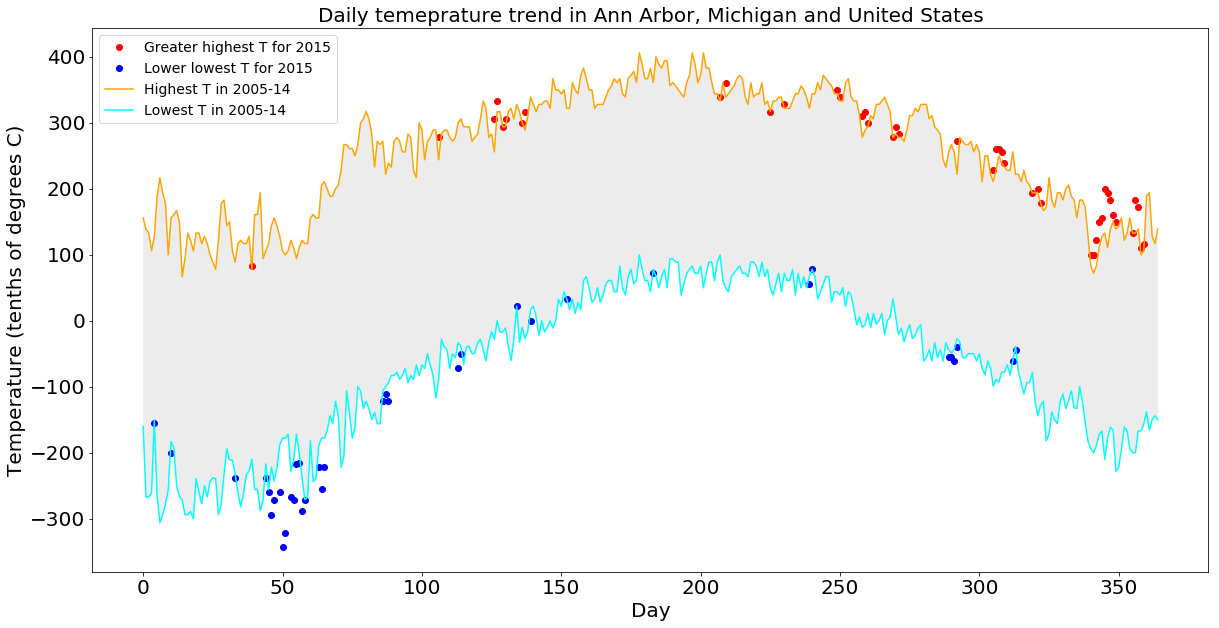

In [206]:
plt.show()

In [197]:
plt.savefig('Weather data.jpeg')